# Data Visualization with Pandas

- Which visualizations are appropriate for X
- How to make them
- Making publication quality charts
- Interactive visualization: IPywidgets and Streamlit

---

In [ ]:
!pip install seaborn

In [1]:
import pandas as pd
import seaborn as sns

In [3]:
df_diamonds = sns.load_dataset('diamonds')

In [14]:
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


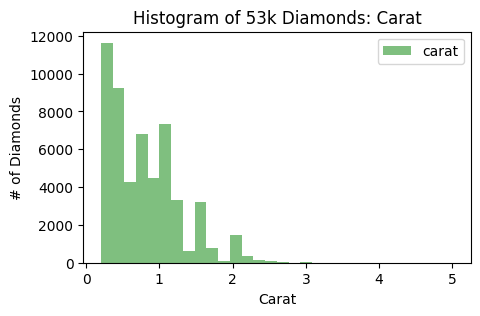

In [33]:
ax = \
(df_diamonds
  .loc[:, 'carat']
  .plot
  .hist(color='green', 
        alpha=0.5, 
        bins=30, 
        legend=True,
        figsize=(5, 3))
)

ax.set_title("Histogram of 53k Diamonds: Carat")
ax.set_xlabel("Carat")
ax.set_ylabel("# of Diamonds");


# For IDEAL diamonds, make barplots of avg PRICE (1) for each COLOR (2) for each CLARITY

## in your favorite color

- Use Pandas .plot.bar()
- hint: use groupby

In [5]:
df_dowjones = sns.load_dataset('dowjones')

In [16]:
df_dowjones.tail()

,Date,Price
644,1968-08-01,883.72
645,1968-09-01,922.80
646,1968-10-01,955.47
647,1968-11-01,964.12
648,1968-12-01,965.39


In [44]:
type(df_dowjones.set_index('Date').loc[:, ['Price']])

pandas.core.frame.DataFrame

In [45]:
type(df_dowjones.set_index('Date').loc[:, 'Price'])

pandas.core.series.Series

<Axes: xlabel='Date'>

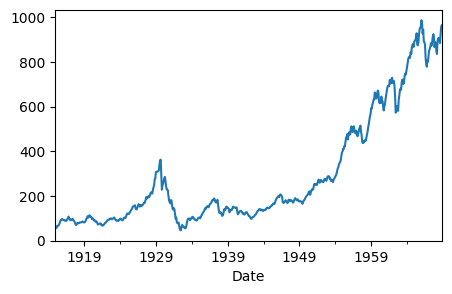

In [47]:
df_dowjones.set_index('Date').loc[:, 'Price'].plot(figsize=(5, 3))

In [96]:
(df_dowjones
  .assign(month_str = lambda fr: fr['Date'].dt.strftime('%m%B'))
 .pivot(columns='month_str', values='Price', index='Date')
 .assign(year = lambda fr: fr.index.year)
 .groupby('year')
 .sum()
  .T
 .iloc[:, -5:]
 # .plot(figsize=(10, 5), alpha=0.3)
)

year,1964,1965,1966,1967,1968
month_str,,,,,
01January,776.62,889.89,985.93,830.56,884.77
02February,793.03,894.41,977.15,851.12,847.20
03March,812.18,896.44,926.43,858.11,834.76
04April,820.94,907.71,943.70,868.66,893.37
05May,823.12,927.50,890.70,883.74,905.22
06June,817.63,878.06,888.73,872.66,906.82
07July,844.24,873.43,875.87,888.51,905.32
08August,835.30,887.70,817.55,912.46,883.72
09September,863.55,922.18,791.65,923.45,922.80


In [7]:
df_health = sns.load_dataset('healthexp')

In [17]:
df_health.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


<Axes: xlabel='Spending_USD', ylabel='Life_Expectancy'>

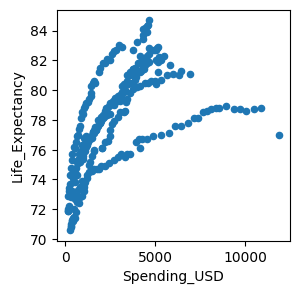

In [106]:
df_health.plot.scatter(x='Spending_USD', y='Life_Expectancy', figsize=(3,3))

<Axes: xlabel='Spending_USD', ylabel='Life_Expectancy'>

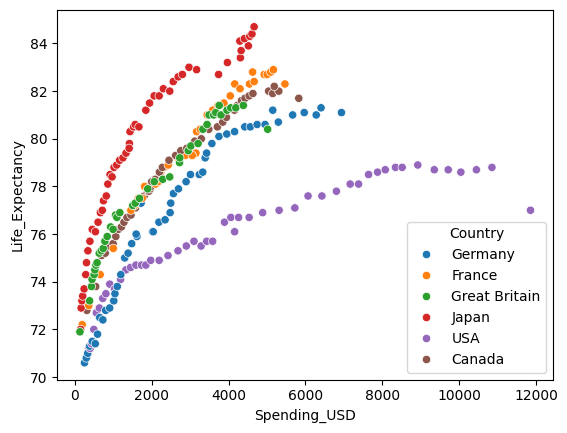

In [107]:
sns.scatterplot(data=df_health, x='Spending_USD', y='Life_Expectancy', hue='Country', )

In [9]:
df_taxis = sns.load_dataset('taxis')

In [18]:
df_taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [99]:
df_taxis.shape

(6433, 14)

<Axes: title={'center': "Some people just won't leave a tip\nno matter how long the taxi ride"}, xlabel='distance', ylabel='tip'>

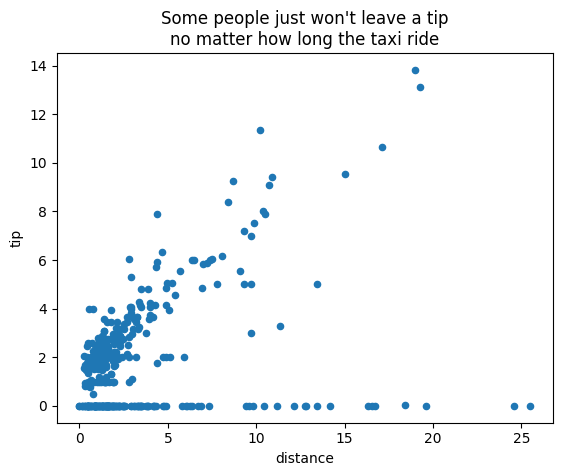

In [102]:
(df_taxis
  .sample(400)
  .plot
  .scatter(x='distance', y='tip', title="Some people just won't leave a tip\nno matter how long the taxi ride"))

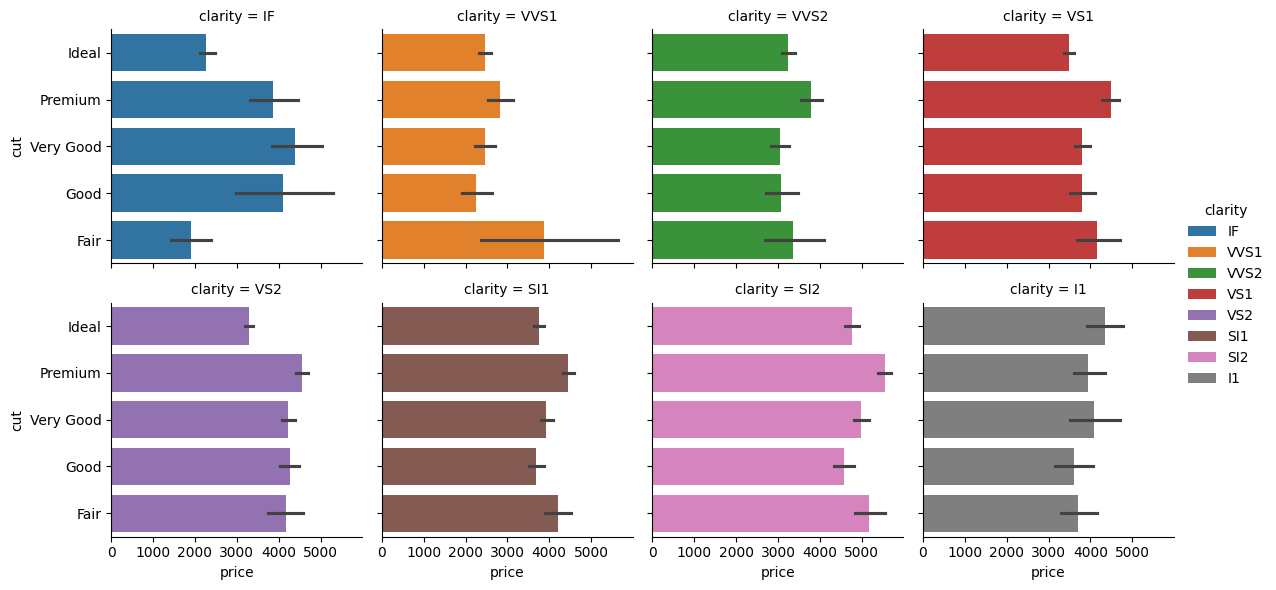

In [126]:
sns.catplot(
  data=df_diamonds, 
  x='price',
  y='cut',
  kind='bar',
  hue='clarity', 
  col='clarity', 
  col_wrap=4,
  height=3
)